In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
df = pd.read_csv('QUERY_DB_DEX_VOLUME_MONTHLY - ORIGINAL-DB-DEX_VOLUME_MONTHLY.csv')

In [4]:
df.head(10)

,Project,Month,Monthly Volume
0,spiritswap,2023-04-01,5 888 666
1,balancer,2023-04-01,1 471 773 238
2,curve,2023-04-01,3 595 163 230
3,apeswap,2023-04-01,35 551 463
4,iziswap,2023-04-01,4 302 574
5,trader_joe,2023-04-01,1 005 369 262
6,biswap,2023-04-01,267 967 895
7,swapr,2023-04-01,354 536
8,spookyswap,2023-04-01,167 772 973
9,equalizer_exchange,2023-04-01,44 212 291


In [5]:
df.shape

(848, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Project         848 non-null    object
 1   Month           848 non-null    object
 2   Monthly Volume  848 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB


In [7]:
unique_counts = df.nunique()
unique_counts

Project            47
Month              25
Monthly Volume    847
dtype: int64

In [8]:
nan_values = df.isna()

In [9]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")
        
print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)


Missing Values in the Entire DataFrame?
False

Missing Values in Each Column?
Project           False
Month             False
Monthly Volume    False
dtype: bool


In [10]:
df = df.rename(columns={'Monthly Volume' : 'Monthly_Volume'})

In [12]:
df['Monthly_Volume'] = df['Monthly_Volume'].str.replace('\u202F','',regex=True)
df['Monthly_VOlume'] = pd.to_numeric(df['Monthly_Volume'], errors = 'coerce')

In [13]:
df['Month'] = pd.to_datetime(df['Month'], format = '%Y-%m-%d', errors='coerce')

In [14]:
df.head(10)

,Project,Month,Monthly_Volume,Monthly_VOlume
0,spiritswap,2023-04-01,5888666,5888666
1,balancer,2023-04-01,1471773238,1471773238
2,curve,2023-04-01,3595163230,3595163230
3,apeswap,2023-04-01,35551463,35551463
4,iziswap,2023-04-01,4302574,4302574
5,trader_joe,2023-04-01,1005369262,1005369262
6,biswap,2023-04-01,267967895,267967895
7,swapr,2023-04-01,354536,354536
8,spookyswap,2023-04-01,167772973,167772973
9,equalizer_exchange,2023-04-01,44212291,44212291


In [15]:
df.shape

(848, 4)

In [16]:
unique_counts = df.nunique()
unique_counts

Project            47
Month              25
Monthly_Volume    847
Monthly_VOlume    847
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Project         848 non-null    object        
 1   Month           848 non-null    datetime64[ns]
 2   Monthly_Volume  848 non-null    object        
 3   Monthly_VOlume  848 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 26.6+ KB


In [18]:
# Since all DEX did not launch at the same time
# We can group and filter using Month and Monthly_Volume,
# To see which DEXs have values in Monthly_Volume for each Month

df_with_volume = df[df['Monthly_Volume'].notnull()]

project_count_per_month = df_with_volume.groupby('Month')['Project'].nunique()
project_count_per_month = project_count_per_month.reset_index().rename(columns={'Project': 'Project_Count'})

project_count_per_month

,Month,Project_Count
0,2021-04-01,17
1,2021-05-01,19
2,2021-06-01,22
3,2021-07-01,23
4,2021-08-01,24
5,2021-09-01,25
6,2021-10-01,26
7,2021-11-01,28
8,2021-12-01,29
9,2022-01-01,31


In [19]:
# for ease of reading we order by DESC 

project_counts = df['Monthly_Volume'].groupby(df['Project']).count().reset_index()
project_counts = project_counts.rename(columns={'Monthly_Volume': 'Count'})

project_counts = project_counts.sort_values(by='Count', ascending=False)
project_counts = project_counts.reset_index(drop=True)

project_counts

,Project,Count
0,Bancor Network,25
1,ellipsis_finance,25
2,uniswap,25
3,swapr,25
4,sushiswap,25
5,spookyswap,25
6,spiritswap,25
7,pancakeswap,25
8,mstable,25
9,DODO,25


In [21]:
# We can now have a look at some projects launch dates 
# As well as projects that stop operating
# Obviously some projects were already launched (our dataset goes back to 2021-04-01)

project_dates = df.groupby('Project')['Month'].agg(['min', 'max']).reset_index()

project_dates = project_dates.rename(columns={'min': 'Launch_Date', 'max': 'Stop_Date'})

project_dates['Status'] = project_dates['Stop_Date'].apply(lambda x: 'ON' if x == pd.to_datetime('2023-04-01') else 'OFF')

project_counts = project_counts.merge(project_dates, on='Project')
project_counts

,Project,Count,Launch_Date_x,Stop_Date_x,Status_x,Launch_Date_y,Stop_Date_y,Status_y
0,Bancor Network,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
1,ellipsis_finance,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
2,uniswap,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
3,swapr,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
4,sushiswap,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
5,spookyswap,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
6,spiritswap,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
7,pancakeswap,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
8,mstable,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON
9,DODO,25,2021-04-01,2023-04-01,ON,2021-04-01,2023-04-01,ON


In [22]:
duplicates = df[df.duplicated(keep=False)]
duplicates 

,Project,Month,Monthly_Volume,Monthly_VOlume


In [24]:
# Convert the column to a numeric type
df['Monthly_Volume'] = pd.to_numeric(df['Monthly_Volume'], errors='coerce')

# Pivot table
pivot_dex = pd.pivot_table(df, values='Monthly_Volume', index='Month', columns='Project', fill_value=0)

# Display the pivot table
pivot_dex.head()


Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,synthetix,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,1.663346e+08,2.377201e+08,5838444.0,2.073670e+08,0.0,0.0,1.489718e+08,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,2.011937e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-01,5.478142e+09,4.563856e+09,188868271.0,2.315517e+09,0.0,0.0,4.325120e+09,0.0,1.393109e+08,0.0,...,0.0,0.000000e+00,9.083000e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-01,1.726794e+09,5.174964e+09,55638331.0,7.492429e+08,0.0,312389063.0,1.356922e+09,0.0,1.671911e+09,10285.0,...,0.0,5.000000e+00,5.929266e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-01,1.231558e+09,3.550015e+09,46526656.0,8.860208e+08,0.0,212943364.0,1.492909e+09,0.0,1.166319e+09,35689964.0,...,0.0,2.196072e+07,3.984560e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-01,2.036522e+09,4.278751e+09,84383716.0,1.472379e+09,0.0,625552466.0,1.676822e+09,0.0,2.707697e+09,54787075.0,...,0.0,1.383066e+09,5.473020e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
pivot_dex.columns

Index(['Bancor Network', 'DODO', 'airswap', 'apeswap', 'arbswap', 'babyswap',
       'balancer', 'beethoven_x', 'biswap', 'clipper', 'curve', 'defiswap',
       'dfx', 'ellipsis_finance', 'equalizer_exchange', 'fraxswap', 'glacier',
       'gmx', 'hashflow', 'integral', 'iziswap', 'kyberswap', 'maverick',
       'mdex', 'mstable', 'nomiswap', 'onepunchswap', 'pancakeswap',
       'platypus_finance', 'quickswap', 'rubicon', 'shibaswap',
       'spartacus_exchange', 'spiritswap', 'spookyswap', 'sushiswap', 'swapr',
       'synthetix', 'trader_joe', 'uniswap', 'velodrome', 'verse_dex',
       'wigoswap', 'wombat', 'woofi', 'zigzag', 'zipswap'],
      dtype='object', name='Project')

In [26]:
# We can sum the total volume of each month creating new column 'Total_Monthly_Volume'

pivot_dex['Total_Monthly_Volume'] = pivot_dex.sum(axis=1)

pivot_dex

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,1.663346e+08,2.377201e+08,5838444.0,2.073670e+08,0.0,0.000000e+00,1.489718e+08,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,2.011937e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,8.781053e+09
2021-05-01,5.478142e+09,4.563856e+09,188868271.0,2.315517e+09,0.0,0.000000e+00,4.325120e+09,0.000000e+00,1.393109e+08,0.0,...,0.000000e+00,9.083000e+10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.819877e+11
2021-06-01,1.726794e+09,5.174964e+09,55638331.0,7.492429e+08,0.0,3.123891e+08,1.356922e+09,0.000000e+00,1.671911e+09,10285.0,...,5.000000e+00,5.929266e+10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.300449e+11
2021-07-01,1.231558e+09,3.550015e+09,46526656.0,8.860208e+08,0.0,2.129434e+08,1.492909e+09,0.000000e+00,1.166319e+09,35689964.0,...,2.196072e+07,3.984560e+10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,9.328456e+10
2021-08-01,2.036522e+09,4.278751e+09,84383716.0,1.472379e+09,0.0,6.255525e+08,1.676822e+09,0.000000e+00,2.707697e+09,54787075.0,...,1.383066e+09,5.473020e+10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.251612e+11
2021-09-01,1.733768e+09,4.381676e+09,122840528.0,1.476142e+09,0.0,1.748846e+09,2.356331e+09,2.001490e+05,3.255339e+09,64689406.0,...,5.450045e+09,5.406594e+10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.350507e+11
2021-10-01,1.564706e+09,4.697736e+09,101417115.0,1.406238e+09,0.0,1.307114e+09,3.199329e+09,4.330328e+08,3.133341e+09,54996725.0,...,7.211124e+09,6.346477e+10,0.000000e+00,0.0,0.0,0.0,177916.0,0.0,0.0,1.647738e+11
2021-11-01,1.815138e+09,4.524436e+09,107733796.0,2.305041e+09,0.0,4.471864e+09,3.404913e+09,4.258711e+08,5.829197e+09,32392612.0,...,1.609871e+10,9.067998e+10,0.000000e+00,0.0,0.0,0.0,2849535.0,0.0,0.0,2.317774e+11
2021-12-01,1.367025e+09,4.333511e+09,132120614.0,1.257346e+09,0.0,6.415568e+09,3.647577e+09,3.839918e+08,8.010370e+09,45705611.0,...,1.542686e+10,8.724079e+10,0.000000e+00,0.0,0.0,0.0,33113182.0,0.0,15378.0,2.095235e+11


In [27]:
# I will devide all values by billion
pivot_dex = pivot_dex / 1e9

In [28]:
pivot_dex.head(10)

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.000000,0.000000,0.000000,...,0.000000e+00,2.011937,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,8.781053
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.000000,0.139311,0.000000,...,0.000000e+00,90.829998,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,281.987699
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.000000,1.671911,0.000010,...,5.000000e-09,59.292663,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,130.044899
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.000000,1.166319,0.035690,...,2.196072e-02,39.845604,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,93.284556
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.000000,2.707697,0.054787,...,1.383066e+00,54.730196,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,125.161244
2021-09-01,1.733768,4.381676,0.122841,1.476142,0.0,1.748846,2.356331,0.000200,3.255339,0.064689,...,5.450045e+00,54.065941,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,135.050695
2021-10-01,1.564706,4.697736,0.101417,1.406238,0.0,1.307114,3.199329,0.433033,3.133341,0.054997,...,7.211124e+00,63.464770,0.0,0.0,0.000000,0.0,0.000178,0.0,0.000000,164.773836
2021-11-01,1.815138,4.524436,0.107734,2.305041,0.0,4.471864,3.404913,0.425871,5.829197,0.032393,...,1.609871e+01,90.679981,0.0,0.0,0.000000,0.0,0.002850,0.0,0.000000,231.777365
2021-12-01,1.367025,4.333511,0.132121,1.257346,0.0,6.415568,3.647577,0.383992,8.010370,0.045706,...,1.542686e+01,87.240790,0.0,0.0,0.000000,0.0,0.033113,0.0,0.000015,209.523549


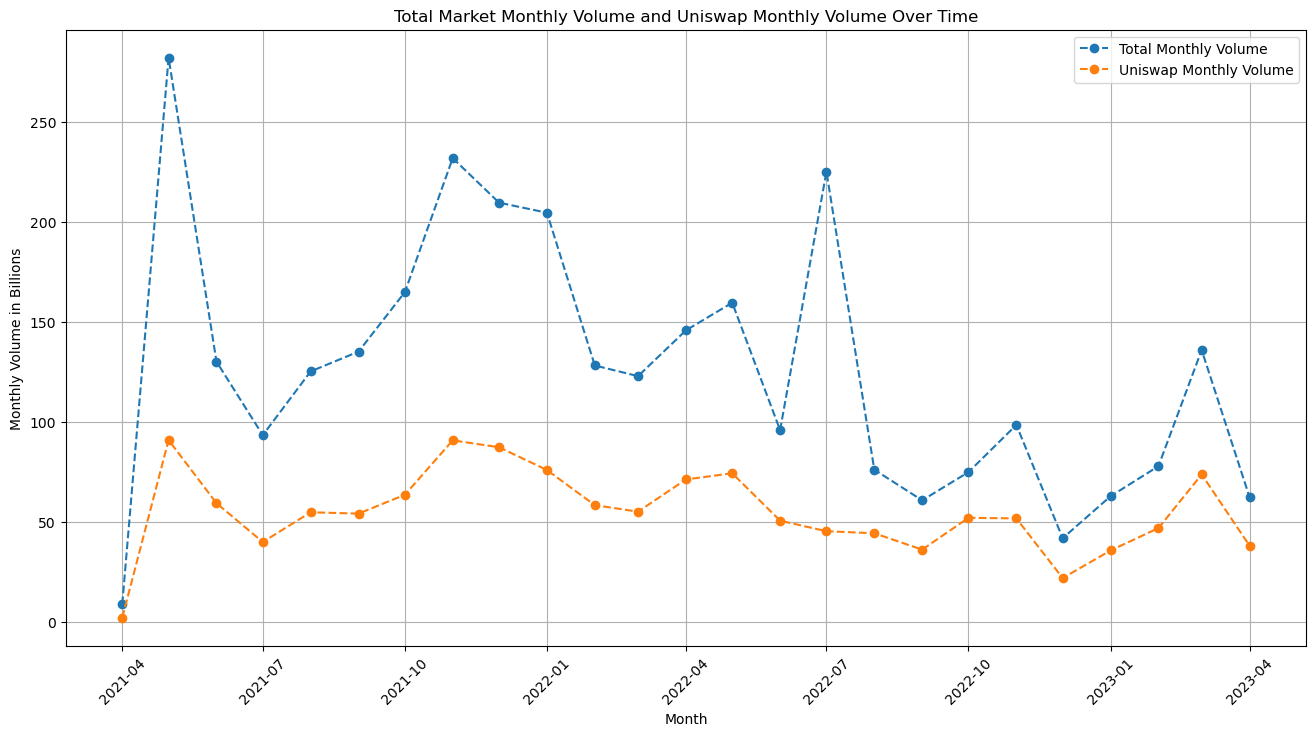

In [29]:
# Simple line chart to get an overview of our data
total_monthly_volume = pivot_dex['Total_Monthly_Volume']
uniswap_market_share = pivot_dex['uniswap']

plt.figure(figsize=(16,8))
plt.plot(total_monthly_volume.index, total_monthly_volume.values, marker='o', linestyle='--', label='Total Monthly Volume')

plt.plot(uniswap_market_share.index, uniswap_market_share.values, marker='o', linestyle='--', label='Uniswap Monthly Volume')

plt.title('Total Market Monthly Volume and Uniswap Monthly Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Volume in Billions')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [30]:
# Adding a column 'Month to our pivot'
pivot_dex['Month'] = pivot_dex.index.month

In [31]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,2.011937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,90.829998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.987699,5
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,59.292663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.044899,6
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,39.845604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.284556,7
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,54.730196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.161244,8


In [32]:
# Adding a column 'Season' to track seasons

def get_season(month):
    if 3 <= month <= 5:
        return'Spring'
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Fall"
    else:
        return "Winter"
    

pivot_dex['Season'] = pivot_dex['Month'].apply(get_season)

In [33]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month,Season
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4,Spring
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.987699,5,Spring
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.044899,6,Summer
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.284556,7,Summer
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.161244,8,Summer


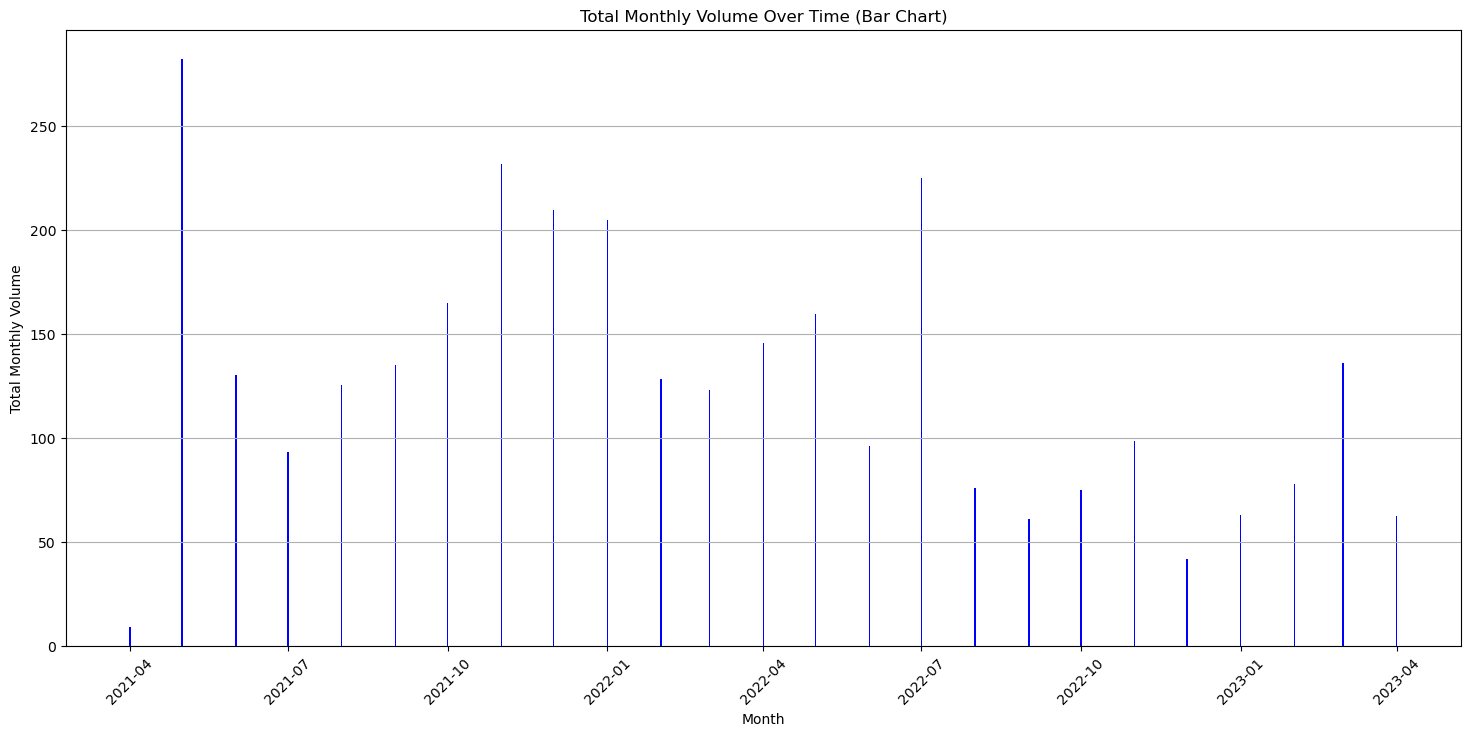

In [35]:
# Plotting a simple bar chart to have a look at data

plt.figure(figsize=(18,8))
plt.bar(pivot_dex.index, pivot_dex['Total_Monthly_Volume'], color = 'b')
plt.title("Total Monthly Volume Over Time (Bar Chart)")
plt.xlabel('Month')
plt.ylabel('Total Monthly Volume')
plt.grid(axis='y')

plt.xticks(rotation = 45)
plt.show()

In [60]:
start_date = '2021-11-01'
end_date = '2023-11-01'

btc_data = yf.download('BTC-USD', start= start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [61]:
btc_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,24726754302
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721


In [62]:
btc_data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,29993.896484,10446520040
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,33086.234375,38363572311
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,33901.527344,44934999645
2023-10-25,33916.042969,35133.757812,33709.109375,34502.820312,34502.820312,25254318008
2023-10-26,34504.289062,34832.910156,33762.324219,34156.648438,34156.648438,19427195376
2023-10-27,34156.500000,34238.210938,33416.886719,33909.800781,33909.800781,16418032871
2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825
2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315


In [63]:
# Adding the column to our pivot
btc_data = btc_data[btc_data.index.day ==1]

In [71]:
# Truncate pivot_dex to match the length of btc_data
pivot_dex = pivot_dex.head(len(btc_data))

# Assign the 'Close' values to the 'BTC_Price' column in pivot_dex
pivot_dex['BTC_Price'] = btc_data['Close'].values


/tmp/ipykernel_8476/1190688407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_dex['BTC_Price'] = btc_data['Close'].values


In [83]:
pivot_dex.head(2)

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,uniswap_Market_Share,pancakeswap_Market_Share,curve_Market_Share,sushiswap_Market_Share,balancer_Market_Share,DODO_Market_Share,mdex_Market_Share,trader_joe_Market_Share,spookyswap_Market_Share,biswap_Market_Share
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.0,0.148972,0.0,0.000000,0.0,...,22.912248,27.139309,3.682979,6.393294,1.696513,2.707194,29.743631,0.0,0.254133,0.000000
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.0,4.325120,0.0,0.139311,0.0,...,32.210624,22.866327,4.665111,10.167137,1.533797,1.618459,15.879877,0.0,0.267058,0.049403


In [84]:
pivot_dex['BTC_Price'] = pivot_dex['BTC_Price'].astype(int)

/tmp/ipykernel_8476/1880731834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_dex['BTC_Price'] = pivot_dex['BTC_Price'].astype(int)


In [85]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,uniswap_Market_Share,pancakeswap_Market_Share,curve_Market_Share,sushiswap_Market_Share,balancer_Market_Share,DODO_Market_Share,mdex_Market_Share,trader_joe_Market_Share,spookyswap_Market_Share,biswap_Market_Share
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,22.912248,27.139309,3.682979,6.393294,1.696513,2.707194,29.743631,0.000000e+00,0.254133,0.000000
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,32.210624,22.866327,4.665111,10.167137,1.533797,1.618459,15.879877,0.000000e+00,0.267058,0.049403
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,45.593994,14.831130,5.409390,10.246356,1.043426,3.979367,14.536235,3.844826e-09,0.202812,1.285641
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,42.714042,17.681620,6.687391,7.279223,1.600381,3.805576,13.065070,2.354164e-02,0.185312,1.250281
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,43.727750,19.520839,5.488721,8.504090,1.339729,3.418591,9.015310,1.105027e+00,0.548565,2.163367


In [86]:
pivot_dex.columns

Index(['Bancor Network', 'DODO', 'airswap', 'apeswap', 'arbswap', 'babyswap',
       'balancer', 'beethoven_x', 'biswap', 'clipper', 'curve', 'defiswap',
       'dfx', 'ellipsis_finance', 'equalizer_exchange', 'fraxswap', 'glacier',
       'gmx', 'hashflow', 'integral', 'iziswap', 'kyberswap', 'maverick',
       'mdex', 'mstable', 'nomiswap', 'onepunchswap', 'pancakeswap',
       'platypus_finance', 'quickswap', 'rubicon', 'shibaswap',
       'spartacus_exchange', 'spiritswap', 'spookyswap', 'sushiswap', 'swapr',
       'synthetix', 'trader_joe', 'uniswap', 'velodrome', 'verse_dex',
       'wigoswap', 'wombat', 'woofi', 'zigzag', 'zipswap',
       'Total_Monthly_Volume', 'Month', 'Season', 'BTC_Price',
       'uniswap_Market_Share', 'pancakeswap_Market_Share',
       'curve_Market_Share', 'sushiswap_Market_Share', 'balancer_Market_Share',
       'DODO_Market_Share', 'mdex_Market_Share', 'trader_joe_Market_Share',
       'spookyswap_Market_Share', 'biswap_Market_Share'],
      dtype='ob

In [87]:
pivot_dex.to_csv('crpto_dex_data.csv', index=True)

In [88]:
dex_df = pivot_dex.drop(['Total_Monthly_Volume','Month', 'Season', 'BTC_Price'], axis=1)

project_total_volume = dex_df.sum()
project_total_volume = project_total_volume.sort_values(ascending=False)

top_10_projects = project_total_volume.head(10)
top_10_projects = top_10_projects.round(2)

top_10_projects

Project
uniswap                     1334.34
uniswap_Market_Share        1105.13
pancakeswap                  443.61
pancakeswap_Market_Share     331.32
curve                        277.14
curve_Market_Share           223.21
balancer                     220.84
sushiswap                    220.16
sushiswap_Market_Share       149.61
balancer_Market_Share        133.28
dtype: float64

In [89]:
total_monthly_volume_total = pivot_dex['Total_Monthly_Volume'].sum()
total_monthly_volume_total

3089.85638921

In [90]:
market_share = (top_10_projects / total_monthly_volume_total) * 100
market_share

Project
uniswap                     43.184531
uniswap_Market_Share        35.766387
pancakeswap                 14.356978
pancakeswap_Market_Share    10.722828
curve                        8.969349
curve_Market_Share           7.223960
balancer                     7.147258
sushiswap                    7.125250
sushiswap_Market_Share       4.841973
balancer_Market_Share        4.313469
dtype: float64

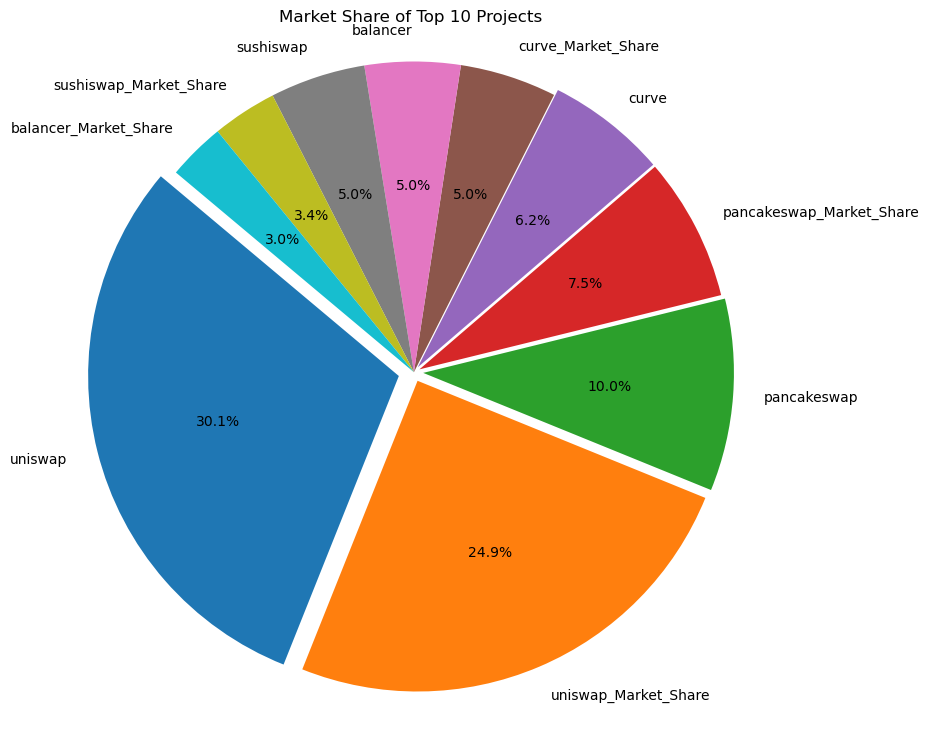

In [91]:
labels = market_share.index
sizes = market_share.values
explode = (0.05, 0.03, 0.03, 0.02, 0.02, 0, 0, 0, 0, 0)

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Projects')
plt.axis('equal')

plt.show()

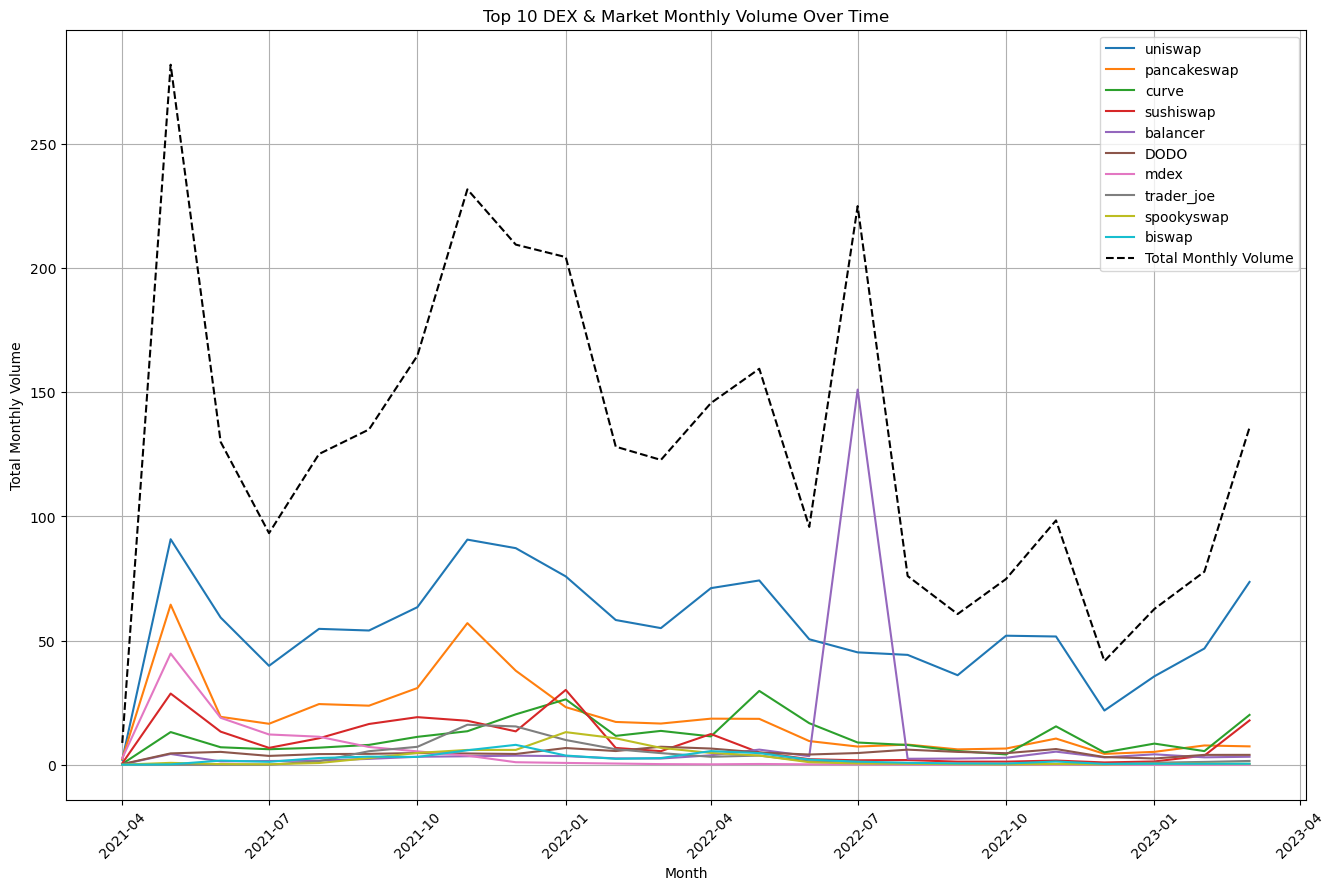

In [92]:
projects_to_plot = ['uniswap', 'pancakeswap', 'curve', 'sushiswap', 'balancer',
                    'DODO', 'mdex', 'trader_joe', 'spookyswap', 'biswap']

plt.figure(figsize=(16, 10))

for project in projects_to_plot:
    plt.plot(pivot_dex.index, pivot_dex[project], label=project)

plt.plot(pivot_dex.index, pivot_dex['Total_Monthly_Volume'], label='Total Monthly Volume', linestyle='--', color='black')

plt.xlabel('Month')
plt.ylabel('Total Monthly Volume')
plt.title('Top 10 DEX & Market Monthly Volume Over Time')

plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.show()


/tmp/ipykernel_8476/1092825648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_dex[project + '_Market_Share'] = (pivot_dex[project] / pivot_dex['Total_Monthly_Volume']) * 100


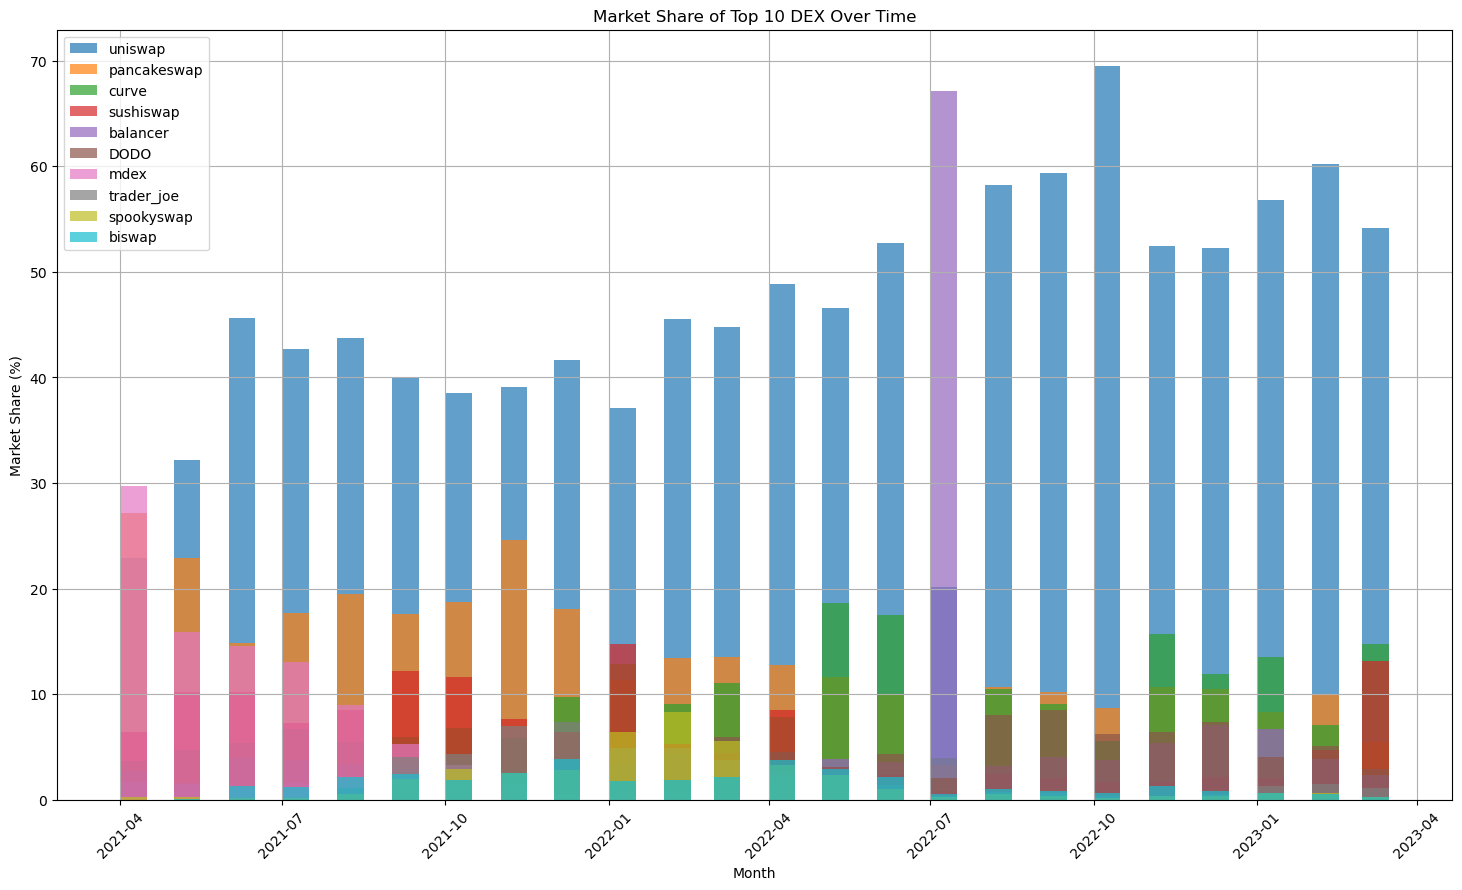

In [93]:
projects_to_plot = ['uniswap', 'pancakeswap', 'curve', 'sushiswap', 'balancer',
                    'DODO', 'mdex', 'trader_joe', 'spookyswap', 'biswap']

plt.figure(figsize=(18, 10))

for project in projects_to_plot:
    pivot_dex[project + '_Market_Share'] = (pivot_dex[project] / pivot_dex['Total_Monthly_Volume']) * 100

bar_width = 15  

for i, project in enumerate(projects_to_plot):
    plt.bar(
        pivot_dex.index,
        pivot_dex[project + '_Market_Share'],
        label=project,
        width=bar_width,
        align='edge',
        alpha=0.7,
    )

plt.xlabel('Month')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Top 10 DEX Over Time')

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()